# Project: Identify Customer Segments

In this project, you will apply unsupervised learning techniques to identify segments of the population that form the core customer base for a mail-order sales company in Germany. These segments can then be used to direct marketing campaigns towards audiences that will have the highest expected rate of returns. The data that you will use has been provided by our partners at Bertelsmann Arvato Analytics, and represents a real-life data science task.

This notebook will help you complete this task by providing a framework within which you will perform your analysis steps. In each step of the project, you will see some text describing the subtask that you will perform, followed by one or more code cells for you to complete your work. **Feel free to add additional code and markdown cells as you go along so that you can explore everything in precise chunks.** The code cells provided in the base template will outline only the major tasks, and will usually not be enough to cover all of the minor tasks that comprise it.

It should be noted that while there will be precise guidelines on how you should handle certain tasks in the project, there will also be places where an exact specification is not provided. **There will be times in the project where you will need to make and justify your own decisions on how to treat the data.** These are places where there may not be only one way to handle the data. In real-life tasks, there may be many valid ways to approach an analysis task. One of the most important things you can do is clearly document your approach so that other scientists can understand the decisions you've made.

At the end of most sections, there will be a Markdown cell labeled **Discussion**. In these cells, you will report your findings for the completed section, as well as document the decisions that you made in your approach to each subtask. **Your project will be evaluated not just on the code used to complete the tasks outlined, but also your communication about your observations and conclusions at each stage.**

In [1]:
# import libraries here; add more as necessary
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# magic word for producing visualizations in notebook
%matplotlib inline

'''
Import note: The classroom currently uses sklearn version 0.19.
If you need to use an imputer, it is available in sklearn.preprocessing.Imputer,
instead of sklearn.impute as in newer versions of sklearn.
'''

'\nImport note: The classroom currently uses sklearn version 0.19.\nIf you need to use an imputer, it is available in sklearn.preprocessing.Imputer,\ninstead of sklearn.impute as in newer versions of sklearn.\n'

### Step 0: Load the Data

There are four files associated with this project (not including this one):

- `Udacity_AZDIAS_Subset.csv`: Demographics data for the general population of Germany; 891211 persons (rows) x 85 features (columns).
- `Udacity_CUSTOMERS_Subset.csv`: Demographics data for customers of a mail-order company; 191652 persons (rows) x 85 features (columns).
- `Data_Dictionary.md`: Detailed information file about the features in the provided datasets.
- `AZDIAS_Feature_Summary.csv`: Summary of feature attributes for demographics data; 85 features (rows) x 4 columns

Each row of the demographics files represents a single person, but also includes information outside of individuals, including information about their household, building, and neighborhood. You will use this information to cluster the general population into groups with similar demographic properties. Then, you will see how the people in the customers dataset fit into those created clusters. The hope here is that certain clusters are over-represented in the customers data, as compared to the general population; those over-represented clusters will be assumed to be part of the core userbase. This information can then be used for further applications, such as targeting for a marketing campaign.

To start off with, load in the demographics data for the general population into a pandas DataFrame, and do the same for the feature attributes summary. Note for all of the `.csv` data files in this project: they're semicolon (`;`) delimited, so you'll need an additional argument in your [`read_csv()`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html) call to read in the data properly. Also, considering the size of the main dataset, it may take some time for it to load completely.

Once the dataset is loaded, it's recommended that you take a little bit of time just browsing the general structure of the dataset and feature summary file. You'll be getting deep into the innards of the cleaning in the first major step of the project, so gaining some general familiarity can help you get your bearings.

In [2]:
!ls

AZDIAS_Feature_Summary.csv	  terms_and_conditions
Data_Dictionary.md		  Udacity_AZDIAS_Subset.csv
Identify_Customer_Segments.ipynb  Udacity_CUSTOMERS_Subset.csv


In [3]:
!head AZDIAS_Feature_Summary.csv

attribute;information_level;type;missing_or_unknown
AGER_TYP;person;categorical;[-1,0]
ALTERSKATEGORIE_GROB;person;ordinal;[-1,0,9]
ANREDE_KZ;person;categorical;[-1,0]
CJT_GESAMTTYP;person;categorical;[0]
FINANZ_MINIMALIST;person;ordinal;[-1]
FINANZ_SPARER;person;ordinal;[-1]
FINANZ_VORSORGER;person;ordinal;[-1]
FINANZ_ANLEGER;person;ordinal;[-1]
FINANZ_UNAUFFAELLIGER;person;ordinal;[-1]


In [4]:
!head -2 Udacity_AZDIAS_Subset.csv

AGER_TYP;ALTERSKATEGORIE_GROB;ANREDE_KZ;CJT_GESAMTTYP;FINANZ_MINIMALIST;FINANZ_SPARER;FINANZ_VORSORGER;FINANZ_ANLEGER;FINANZ_UNAUFFAELLIGER;FINANZ_HAUSBAUER;FINANZTYP;GEBURTSJAHR;GFK_URLAUBERTYP;GREEN_AVANTGARDE;HEALTH_TYP;LP_LEBENSPHASE_FEIN;LP_LEBENSPHASE_GROB;LP_FAMILIE_FEIN;LP_FAMILIE_GROB;LP_STATUS_FEIN;LP_STATUS_GROB;NATIONALITAET_KZ;PRAEGENDE_JUGENDJAHRE;RETOURTYP_BK_S;SEMIO_SOZ;SEMIO_FAM;SEMIO_REL;SEMIO_MAT;SEMIO_VERT;SEMIO_LUST;SEMIO_ERL;SEMIO_KULT;SEMIO_RAT;SEMIO_KRIT;SEMIO_DOM;SEMIO_KAEM;SEMIO_PFLICHT;SEMIO_TRADV;SHOPPER_TYP;SOHO_KZ;TITEL_KZ;VERS_TYP;ZABEOTYP;ALTER_HH;ANZ_PERSONEN;ANZ_TITEL;HH_EINKOMMEN_SCORE;KK_KUNDENTYP;W_KEIT_KIND_HH;WOHNDAUER_2008;ANZ_HAUSHALTE_AKTIV;ANZ_HH_TITEL;GEBAEUDETYP;KONSUMNAEHE;MIN_GEBAEUDEJAHR;OST_WEST_KZ;WOHNLAGE;CAMEO_DEUG_2015;CAMEO_DEU_2015;CAMEO_INTL_2015;KBA05_ANTG1;KBA05_ANTG2;KBA05_ANTG3;KBA05_ANTG4;KBA05_BAUMAX;KBA05_GBZ;BALLRAUM;EWDICHTE;INNENSTADT;GEBAEUDETYP_RASTER;KKK;MOBI_REGIO;ONLINE_AFFINITAET;REGIOTYP;KBA13_ANZAHL_PKW;PLZ8_ANTG

In [5]:
# Load in the general demographics data.
azdias = pd.read_csv("Udacity_AZDIAS_Subset.csv", delimiter=";")

In [6]:
# Load in the feature summary file.
feat_info = pd.read_csv("AZDIAS_Feature_Summary.csv", delimiter=";")

In [7]:
# Check the structure of the data after it's loaded (e.g. print the number of
# rows and columns, print the first few rows).

print(azdias.shape)
azdias.head()

(891221, 85)


,AGER_TYP,ALTERSKATEGORIE_GROB,ANREDE_KZ,CJT_GESAMTTYP,FINANZ_MINIMALIST,FINANZ_SPARER,FINANZ_VORSORGER,FINANZ_ANLEGER,FINANZ_UNAUFFAELLIGER,FINANZ_HAUSBAUER,...,PLZ8_ANTG1,PLZ8_ANTG2,PLZ8_ANTG3,PLZ8_ANTG4,PLZ8_BAUMAX,PLZ8_HHZ,PLZ8_GBZ,ARBEIT,ORTSGR_KLS9,RELAT_AB
0,-1,2,1,2.0,3,4,3,5,5,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,-1,1,2,5.0,1,5,2,5,4,5,...,2.0,3.0,2.0,1.0,1.0,5.0,4.0,3.0,5.0,4.0
2,-1,3,2,3.0,1,4,1,2,3,5,...,3.0,3.0,1.0,0.0,1.0,4.0,4.0,3.0,5.0,2.0
3,2,4,2,2.0,4,2,5,2,1,2,...,2.0,2.0,2.0,0.0,1.0,3.0,4.0,2.0,3.0,3.0
4,-1,3,1,5.0,4,3,4,1,3,2,...,2.0,4.0,2.0,1.0,2.0,3.0,3.0,4.0,6.0,5.0


In [8]:
azdias.describe()

,AGER_TYP,ALTERSKATEGORIE_GROB,ANREDE_KZ,CJT_GESAMTTYP,FINANZ_MINIMALIST,FINANZ_SPARER,FINANZ_VORSORGER,FINANZ_ANLEGER,FINANZ_UNAUFFAELLIGER,FINANZ_HAUSBAUER,...,PLZ8_ANTG1,PLZ8_ANTG2,PLZ8_ANTG3,PLZ8_ANTG4,PLZ8_BAUMAX,PLZ8_HHZ,PLZ8_GBZ,ARBEIT,ORTSGR_KLS9,RELAT_AB
count,891221.000000,891221.000000,891221.000000,886367.000000,891221.000000,891221.000000,891221.000000,891221.000000,891221.000000,891221.000000,...,774706.000000,774706.000000,774706.000000,774706.000000,774706.000000,774706.000000,774706.000000,794005.000000,794005.000000,794005.00000
mean,-0.358435,2.777398,1.522098,3.632838,3.074528,2.821039,3.401106,3.033328,2.874167,3.075121,...,2.253330,2.801858,1.595426,0.699166,1.943913,3.612821,3.381087,3.167854,5.293002,3.07222
std,1.198724,1.068775,0.499512,1.595021,1.321055,1.464749,1.322134,1.529603,1.486731,1.353248,...,0.972008,0.920309,0.986736,0.727137,1.459654,0.973967,1.111598,1.002376,2.303739,1.36298
min,-1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.00000
25%,-1.000000,2.000000,1.000000,2.000000,2.000000,1.000000,3.000000,2.000000,2.000000,2.000000,...,1.000000,2.000000,1.000000,0.000000,1.000000,3.000000,3.000000,3.000000,4.000000,2.00000
50%,-1.000000,3.000000,2.000000,4.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,...,2.000000,3.000000,2.000000,1.000000,1.000000,4.000000,3.000000,3.000000,5.000000,3.00000
75%,-1.000000,4.000000,2.000000,5.000000,4.000000,4.000000,5.000000,5.000000,4.000000,4.000000,...,3.000000,3.000000,2.000000,1.000000,3.000000,4.000000,4.000000,4.000000,7.000000,4.00000
max,3.000000,9.000000,2.000000,6.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,4.000000,4.000000,3.000000,2.000000,5.000000,5.000000,5.000000,9.000000,9.000000,9.00000


In [9]:
azdias.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891221 entries, 0 to 891220
Data columns (total 85 columns):
AGER_TYP                 891221 non-null int64
ALTERSKATEGORIE_GROB     891221 non-null int64
ANREDE_KZ                891221 non-null int64
CJT_GESAMTTYP            886367 non-null float64
FINANZ_MINIMALIST        891221 non-null int64
FINANZ_SPARER            891221 non-null int64
FINANZ_VORSORGER         891221 non-null int64
FINANZ_ANLEGER           891221 non-null int64
FINANZ_UNAUFFAELLIGER    891221 non-null int64
FINANZ_HAUSBAUER         891221 non-null int64
FINANZTYP                891221 non-null int64
GEBURTSJAHR              891221 non-null int64
GFK_URLAUBERTYP          886367 non-null float64
GREEN_AVANTGARDE         891221 non-null int64
HEALTH_TYP               891221 non-null int64
LP_LEBENSPHASE_FEIN      886367 non-null float64
LP_LEBENSPHASE_GROB      886367 non-null float64
LP_FAMILIE_FEIN          886367 non-null float64
LP_FAMILIE_GROB          886367 n

> **Tip**: Add additional cells to keep everything in reasonably-sized chunks! Keyboard shortcut `esc --> a` (press escape to enter command mode, then press the 'A' key) adds a new cell before the active cell, and `esc --> b` adds a new cell after the active cell. If you need to convert an active cell to a markdown cell, use `esc --> m` and to convert to a code cell, use `esc --> y`. 

## Step 1: Preprocessing

### Step 1.1: Assess Missing Data

The feature summary file contains a summary of properties for each demographics data column. You will use this file to help you make cleaning decisions during this stage of the project. First of all, you should assess the demographics data in terms of missing data. Pay attention to the following points as you perform your analysis, and take notes on what you observe. Make sure that you fill in the **Discussion** cell with your findings and decisions at the end of each step that has one!

#### Step 1.1.1: Convert Missing Value Codes to NaNs
The fourth column of the feature attributes summary (loaded in above as `feat_info`) documents the codes from the data dictionary that indicate missing or unknown data. While the file encodes this as a list (e.g. `[-1,0]`), this will get read in as a string object. You'll need to do a little bit of parsing to make use of it to identify and clean the data. Convert data that matches a 'missing' or 'unknown' value code into a numpy NaN value. You might want to see how much data takes on a 'missing' or 'unknown' code, and how much data is naturally missing, as a point of interest.

**As one more reminder, you are encouraged to add additional cells to break up your analysis into manageable chunks.**

In [10]:
feat_info.head()

,attribute,information_level,type,missing_or_unknown
0,AGER_TYP,person,categorical,"[-1,0]"
1,ALTERSKATEGORIE_GROB,person,ordinal,"[-1,0,9]"
2,ANREDE_KZ,person,categorical,"[-1,0]"
3,CJT_GESAMTTYP,person,categorical,[0]
4,FINANZ_MINIMALIST,person,ordinal,[-1]


In [11]:
# Identify missing or unknown data values and convert them to NaNs.

def miss_unk_unpack(missing_or_unknown):
    
    missing_values = missing_or_unknown.replace(" ", "").strip("[").strip("]").split(",")
    output = []
    for v in missing_values:
        try:
            output.append(int(v))
        except ValueError:
            output.append(v)
            
    return output

feat_info["miss_unk_unpacked"] = feat_info.apply(lambda row: miss_unk_unpack(row["missing_or_unknown"]), axis=1)

In [12]:
feat_info

,attribute,information_level,type,missing_or_unknown,miss_unk_unpacked
0,AGER_TYP,person,categorical,"[-1,0]","[-1, 0]"
1,ALTERSKATEGORIE_GROB,person,ordinal,"[-1,0,9]","[-1, 0, 9]"
2,ANREDE_KZ,person,categorical,"[-1,0]","[-1, 0]"
3,CJT_GESAMTTYP,person,categorical,[0],[0]
4,FINANZ_MINIMALIST,person,ordinal,[-1],[-1]
5,FINANZ_SPARER,person,ordinal,[-1],[-1]
6,FINANZ_VORSORGER,person,ordinal,[-1],[-1]
7,FINANZ_ANLEGER,person,ordinal,[-1],[-1]
8,FINANZ_UNAUFFAELLIGER,person,ordinal,[-1],[-1]
9,FINANZ_HAUSBAUER,person,ordinal,[-1],[-1]


In [13]:
feat_info.miss_unk_unpacked[0], type(feat_info.miss_unk_unpacked[0])

([-1, 0], list)

In [14]:
feat_info.miss_unk_unpacked[59], type(feat_info.miss_unk_unpacked[59])

([-1, 'XX'], list)

In [15]:
feat_info["miss_unk_unpacked"].loc[feat_info.attribute=="AGER_TYP"][0]

[-1, 0]

In [16]:
def missing_value_map(column_name):
    try:
        for v in feat_info.loc[feat_info.attribute==column_name, "miss_unk_unpacked"].values[0]:
            azdias.loc[:,column_name].replace(v, np.nan, inplace=True)
    except KeyError:
        pass

In [17]:
for col in azdias.columns:
    missing_value_map(col)

In [18]:
azdias.head()

,AGER_TYP,ALTERSKATEGORIE_GROB,ANREDE_KZ,CJT_GESAMTTYP,FINANZ_MINIMALIST,FINANZ_SPARER,FINANZ_VORSORGER,FINANZ_ANLEGER,FINANZ_UNAUFFAELLIGER,FINANZ_HAUSBAUER,...,PLZ8_ANTG1,PLZ8_ANTG2,PLZ8_ANTG3,PLZ8_ANTG4,PLZ8_BAUMAX,PLZ8_HHZ,PLZ8_GBZ,ARBEIT,ORTSGR_KLS9,RELAT_AB
0,NaN,2.0,1,2.0,3,4,3,5,5,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,1.0,2,5.0,1,5,2,5,4,5,...,2.0,3.0,2.0,1.0,1.0,5.0,4.0,3.0,5.0,4.0
2,NaN,3.0,2,3.0,1,4,1,2,3,5,...,3.0,3.0,1.0,0.0,1.0,4.0,4.0,3.0,5.0,2.0
3,2.0,4.0,2,2.0,4,2,5,2,1,2,...,2.0,2.0,2.0,0.0,1.0,3.0,4.0,2.0,3.0,3.0
4,NaN,3.0,1,5.0,4,3,4,1,3,2,...,2.0,4.0,2.0,1.0,2.0,3.0,3.0,4.0,6.0,5.0


#### Step 1.1.2: Assess Missing Data in Each Column

How much missing data is present in each column? There are a few columns that are outliers in terms of the proportion of values that are missing. You will want to use matplotlib's [`hist()`](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.hist.html) function to visualize the distribution of missing value counts to find these columns. Identify and document these columns. While some of these columns might have justifications for keeping or re-encoding the data, for this project you should just remove them from the dataframe. (Feel free to make remarks about these outlier columns in the discussion, however!)

For the remaining features, are there any patterns in which columns have, or share, missing data?

In [19]:
# Perform an assessment of how much missing data there is in each column of the
# dataset.

azdias.isnull().sum() / azdias.shape[0] * 100.0

AGER_TYP                 76.955435
ALTERSKATEGORIE_GROB      0.323264
ANREDE_KZ                 0.000000
CJT_GESAMTTYP             0.544646
FINANZ_MINIMALIST         0.000000
FINANZ_SPARER             0.000000
FINANZ_VORSORGER          0.000000
FINANZ_ANLEGER            0.000000
FINANZ_UNAUFFAELLIGER     0.000000
FINANZ_HAUSBAUER          0.000000
FINANZTYP                 0.000000
GEBURTSJAHR              44.020282
GFK_URLAUBERTYP           0.544646
GREEN_AVANTGARDE          0.000000
HEALTH_TYP               12.476816
LP_LEBENSPHASE_FEIN      10.954859
LP_LEBENSPHASE_GROB      10.611509
LP_FAMILIE_FEIN           8.728699
LP_FAMILIE_GROB           8.728699
LP_STATUS_FEIN            0.544646
LP_STATUS_GROB            0.544646
NATIONALITAET_KZ         12.153551
PRAEGENDE_JUGENDJAHRE    12.136608
RETOURTYP_BK_S            0.544646
SEMIO_SOZ                 0.000000
SEMIO_FAM                 0.000000
SEMIO_REL                 0.000000
SEMIO_MAT                 0.000000
SEMIO_VERT          

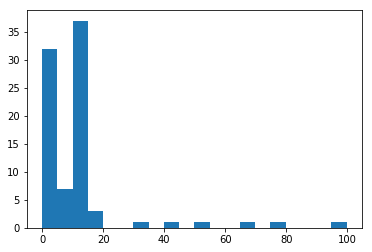

In [20]:
plt.hist(azdias.isnull().sum() / azdias.shape[0] * 100.0, bins=20);

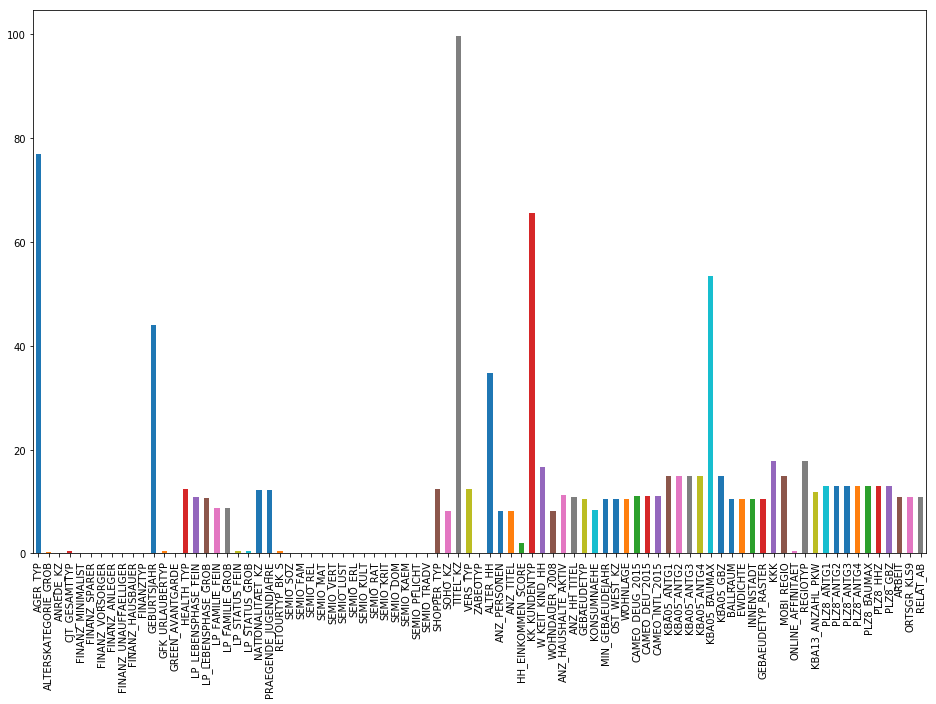

In [21]:
# Investigate patterns in the amount of missing data in each column.

plt.figure(figsize=(16,10))
(azdias.isnull().sum() / azdias.shape[0] * 100.0).plot(kind="bar")

In [22]:
azdias.isnull().sum()

AGER_TYP                 685843
ALTERSKATEGORIE_GROB       2881
ANREDE_KZ                     0
CJT_GESAMTTYP              4854
FINANZ_MINIMALIST             0
FINANZ_SPARER                 0
FINANZ_VORSORGER              0
FINANZ_ANLEGER                0
FINANZ_UNAUFFAELLIGER         0
FINANZ_HAUSBAUER              0
FINANZTYP                     0
GEBURTSJAHR              392318
GFK_URLAUBERTYP            4854
GREEN_AVANTGARDE              0
HEALTH_TYP               111196
LP_LEBENSPHASE_FEIN       97632
LP_LEBENSPHASE_GROB       94572
LP_FAMILIE_FEIN           77792
LP_FAMILIE_GROB           77792
LP_STATUS_FEIN             4854
LP_STATUS_GROB             4854
NATIONALITAET_KZ         108315
PRAEGENDE_JUGENDJAHRE    108164
RETOURTYP_BK_S             4854
SEMIO_SOZ                     0
SEMIO_FAM                     0
SEMIO_REL                     0
SEMIO_MAT                     0
SEMIO_VERT                    0
SEMIO_LUST                    0
                          ...  
OST_WEST

In [23]:
# Remove the outlier columns from the dataset. (You'll perform other data
# engineering tasks such as re-encoding and imputation later.)

(azdias.isnull().sum() / azdias.shape[0] * 100.0).loc[(azdias.isnull().sum() / azdias.shape[0] * 100.0) > 20].index

Index(['AGER_TYP', 'GEBURTSJAHR', 'TITEL_KZ', 'ALTER_HH', 'KK_KUNDENTYP',
       'KBA05_BAUMAX'],
      dtype='object')

In [24]:
cols_to_remove = ['AGER_TYP', 'GEBURTSJAHR', 'TITEL_KZ', 'ALTER_HH', 'KK_KUNDENTYP', 'KBA05_BAUMAX']

In [25]:
feat_info[feat_info.attribute.isin(cols_to_remove)]

,attribute,information_level,type,missing_or_unknown,miss_unk_unpacked
0,AGER_TYP,person,categorical,"[-1,0]","[-1, 0]"
11,GEBURTSJAHR,person,numeric,[0],[0]
40,TITEL_KZ,person,categorical,"[-1,0]","[-1, 0]"
43,ALTER_HH,household,interval,[0],[0]
47,KK_KUNDENTYP,household,categorical,[-1],[-1]
64,KBA05_BAUMAX,microcell_rr3,mixed,"[-1,0]","[-1, 0]"


In [26]:
for col in cols_to_remove:
    print(col)
    print(azdias[col].value_counts())
    print("========================================\n")

AGER_TYP
2.0    98472
1.0    79802
3.0    27104
Name: AGER_TYP, dtype: int64

GEBURTSJAHR
1967.0    11183
1965.0    11090
1966.0    10933
1970.0    10883
1964.0    10799
1968.0    10792
1963.0    10513
1969.0    10360
1980.0    10275
1962.0    10082
1961.0     9880
1971.0     9786
1982.0     9516
1978.0     9509
1960.0     9492
1979.0     9422
1981.0     9374
1977.0     9296
1959.0     9098
1972.0     9027
1976.0     9005
1983.0     8887
1974.0     8676
1984.0     8553
1975.0     8480
1973.0     8356
1958.0     8323
1986.0     8192
1985.0     8180
1957.0     8099
          ...  
2009.0      559
2008.0      550
2010.0      545
2011.0      485
1923.0      468
2013.0      380
1922.0      375
1921.0      355
2015.0      257
1920.0      238
1919.0      194
2016.0      167
2014.0      124
1918.0       85
1917.0       55
1914.0       55
1916.0       45
1910.0       41
1913.0       39
1915.0       37
1911.0       30
1912.0       28
1905.0        8
1909.0        7
1908.0        7
1906.0        

In [27]:
azdias.shape

(891221, 85)

In [28]:
azdias.drop(columns=cols_to_remove, inplace=True)
azdias.shape

(891221, 79)

In [29]:
(azdias.isnull().sum() / azdias.shape[0] * 100.0).sort_values(ascending=False)

KKK                      17.735668
REGIOTYP                 17.735668
W_KEIT_KIND_HH           16.605084
MOBI_REGIO               14.959701
KBA05_ANTG4              14.959701
KBA05_ANTG3              14.959701
KBA05_ANTG2              14.959701
KBA05_ANTG1              14.959701
KBA05_GBZ                14.959701
PLZ8_ANTG2               13.073637
PLZ8_ANTG1               13.073637
PLZ8_ANTG3               13.073637
PLZ8_ANTG4               13.073637
PLZ8_BAUMAX              13.073637
PLZ8_HHZ                 13.073637
PLZ8_GBZ                 13.073637
HEALTH_TYP               12.476816
SHOPPER_TYP              12.476816
VERS_TYP                 12.476816
NATIONALITAET_KZ         12.153551
PRAEGENDE_JUGENDJAHRE    12.136608
KBA13_ANZAHL_PKW         11.871354
ANZ_HAUSHALTE_AKTIV      11.176913
CAMEO_INTL_2015          11.147852
CAMEO_DEU_2015           11.147852
CAMEO_DEUG_2015          11.147852
LP_LEBENSPHASE_FEIN      10.954859
RELAT_AB                 10.926022
ARBEIT              

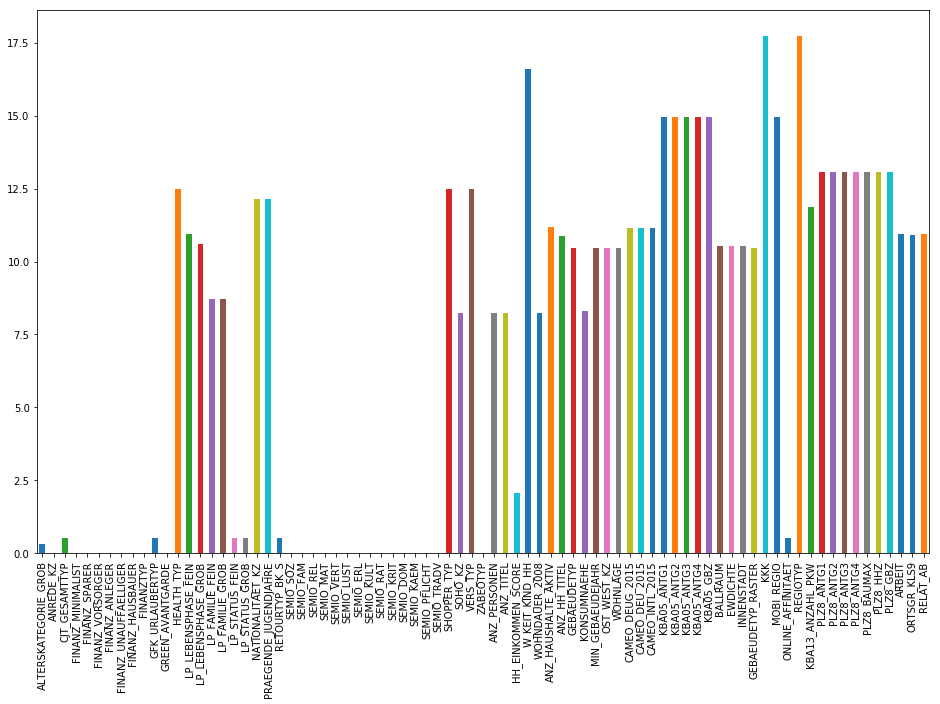

In [30]:
plt.figure(figsize=(16,10))
(azdias.isnull().sum() / azdias.shape[0] * 100.0).plot(kind="bar")

#### Discussion 1.1.2: Assess Missing Data in Each Column

After assessing the percentage of values missing from each column, I clearly noticed that the majority of columns had less than 20% missing values and that 20% was a good threshold to remove those other columns with high levels of missing values. To this end, I removed `['AGER_TYP', 'GEBURTSJAHR', 'TITEL_KZ', 'ALTER_HH', 'KK_KUNDENTYP', 'KBA05_BAUMAX']`.  These columns also seem to have either high cardinality or rather uneven distributions.  Of the remaining columns, one thing to note is that similar "groups" of columns tend to have similar rates of missing values. For example, columns starting with "KBA05..." tend to have the same volume of missing values while all of the "SEMO_..." columns do not have any missing values.   

Given that I do not have a strong domain expertise in this dataset or in the business goal of the exercise, I'd rather not give up too much data in the beginning. In more realistic settings, we may need to do this multiple times and iterate with some business or domain SMEs.

#### Step 1.1.3: Assess Missing Data in Each Row

Now, you'll perform a similar assessment for the rows of the dataset. How much data is missing in each row? As with the columns, you should see some groups of points that have a very different numbers of missing values. Divide the data into two subsets: one for data points that are above some threshold for missing values, and a second subset for points below that threshold.

In order to know what to do with the outlier rows, we should see if the distribution of data values on columns that are not missing data (or are missing very little data) are similar or different between the two groups. Select at least five of these columns and compare the distribution of values.
- You can use seaborn's [`countplot()`](https://seaborn.pydata.org/generated/seaborn.countplot.html) function to create a bar chart of code frequencies and matplotlib's [`subplot()`](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.subplot.html) function to put bar charts for the two subplots side by side.
- To reduce repeated code, you might want to write a function that can perform this comparison, taking as one of its arguments a column to be compared.

Depending on what you observe in your comparison, this will have implications on how you approach your conclusions later in the analysis. If the distributions of non-missing features look similar between the data with many missing values and the data with few or no missing values, then we could argue that simply dropping those points from the analysis won't present a major issue. On the other hand, if the data with many missing values looks very different from the data with few or no missing values, then we should make a note on those data as special. We'll revisit these data later on. **Either way, you should continue your analysis for now using just the subset of the data with few or no missing values.**

In [31]:
# How much data is missing in each row of the dataset?

nulls_per_row = azdias.apply(lambda row: row.isnull().sum(), axis=1)

In [32]:
nulls_per_row

0         43
1          0
2          0
3          7
4          0
5          0
6          0
7          0
8          0
9          0
10         0
11        47
12         6
13         8
14        47
15         8
16         6
17        47
18         3
19         0
20        10
21         0
22         0
23         8
24        47
25         5
26        19
27         0
28         0
29         2
          ..
891191     0
891192     0
891193     0
891194     0
891195     0
891196     0
891197     0
891198     0
891199     0
891200     0
891201     0
891202     0
891203    14
891204     0
891205     0
891206     0
891207     0
891208     3
891209     0
891210     0
891211     0
891212     0
891213     0
891214     0
891215     0
891216     3
891217     4
891218     5
891219     0
891220     0
Length: 891221, dtype: int64

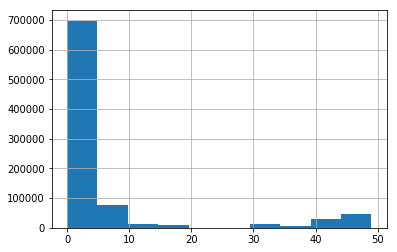

In [33]:
(nulls_per_row).hist()

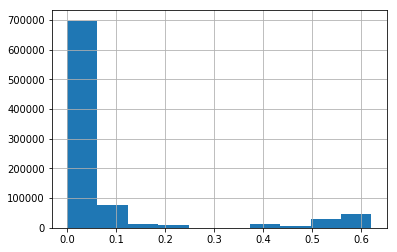

In [34]:
(nulls_per_row / azdias.shape[1]).hist()

In [35]:
azdias["row_null_count"] = nulls_per_row

In [36]:
# Write code to divide the data into two subsets based on the number of missing
# values in each row.

azdias["subset"] = azdias.apply(lambda row: "subset2" if row.row_null_count > 9 else "subset1", axis=1)

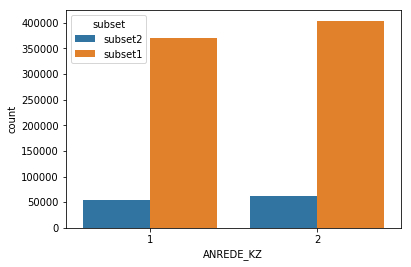

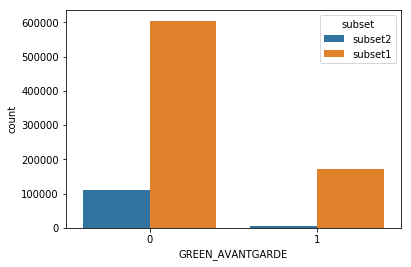

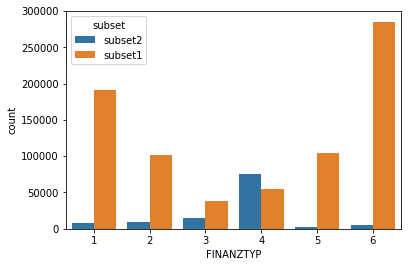

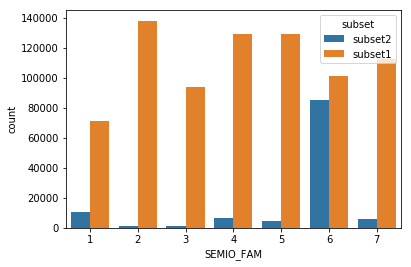

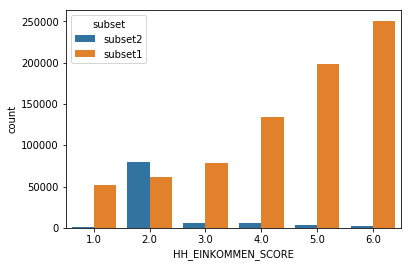

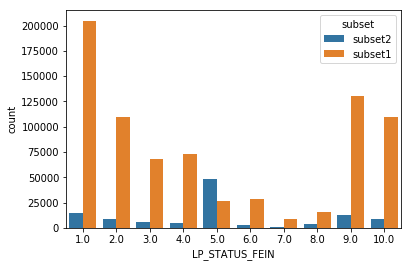

In [37]:
# Compare the distribution of values for at least five columns where there are
# no or few missing values, between the two subsets.
for c in ['ANREDE_KZ','GREEN_AVANTGARDE','FINANZTYP','SEMIO_FAM','HH_EINKOMMEN_SCORE','LP_STATUS_FEIN']:
    sns.countplot(x=c, hue="subset", data=azdias)
    plt.show()

In [38]:
azdias_subset = azdias.loc[azdias.subset == "subset1"]

In [39]:
azdias_subset.shape

(774743, 81)

#### Discussion 1.1.3: Assess Missing Data in Each Row

Now looking at the missing values per row, we can again see from the distribution that there is a very clear cut delineation at 20 or less missing values per row. The majority of rows do not have missing values and the vast majority have less than 20 missing values per row. But there are some rows that do have more than 20 missing values out of 81 values per row, and this clearly made up the filtering criterion for separating out my two subsets. In this regard, I kept all the rows with 20 or less missing values per row, and this resulted in a cleaned up dataset of `774743` rows or about 87% of the original data.

### Step 1.2: Select and Re-Encode Features

Checking for missing data isn't the only way in which you can prepare a dataset for analysis. Since the unsupervised learning techniques to be used will only work on data that is encoded numerically, you need to make a few encoding changes or additional assumptions to be able to make progress. In addition, while almost all of the values in the dataset are encoded using numbers, not all of them represent numeric values. Check the third column of the feature summary (`feat_info`) for a summary of types of measurement.
- For numeric and interval data, these features can be kept without changes.
- Most of the variables in the dataset are ordinal in nature. While ordinal values may technically be non-linear in spacing, make the simplifying assumption that the ordinal variables can be treated as being interval in nature (that is, kept without any changes).
- Special handling may be necessary for the remaining two variable types: categorical, and 'mixed'.

In the first two parts of this sub-step, you will perform an investigation of the categorical and mixed-type features and make a decision on each of them, whether you will keep, drop, or re-encode each. Then, in the last part, you will create a new data frame with only the selected and engineered columns.

Data wrangling is often the trickiest part of the data analysis process, and there's a lot of it to be done here. But stick with it: once you're done with this step, you'll be ready to get to the machine learning parts of the project!

In [47]:
# How many features are there of each data type?

feat_info.type.value_counts()

ordinal        49
categorical    21
mixed           7
numeric         7
interval        1
Name: type, dtype: int64

In [48]:
categorical = list(feat_info.query("type =='categorical'")["attribute"])
mixed       = list(feat_info.query("type =='mixed'")["attribute"])
ordinal     = list(feat_info.query("type =='ordinal'")["attribute"])
numeric     = list(feat_info.query("type =='numeric'")["attribute"])
interval    = list(feat_info.query("type =='interval'")["attribute"])

In [49]:
interval

['ALTER_HH']

In [50]:
# here, we will specifically deal with categorical and mixed data types

In [51]:
categorical, mixed

(['AGER_TYP',
  'ANREDE_KZ',
  'CJT_GESAMTTYP',
  'FINANZTYP',
  'GFK_URLAUBERTYP',
  'GREEN_AVANTGARDE',
  'LP_FAMILIE_FEIN',
  'LP_FAMILIE_GROB',
  'LP_STATUS_FEIN',
  'LP_STATUS_GROB',
  'NATIONALITAET_KZ',
  'SHOPPER_TYP',
  'SOHO_KZ',
  'TITEL_KZ',
  'VERS_TYP',
  'ZABEOTYP',
  'KK_KUNDENTYP',
  'GEBAEUDETYP',
  'OST_WEST_KZ',
  'CAMEO_DEUG_2015',
  'CAMEO_DEU_2015'],
 ['LP_LEBENSPHASE_FEIN',
  'LP_LEBENSPHASE_GROB',
  'PRAEGENDE_JUGENDJAHRE',
  'WOHNLAGE',
  'CAMEO_INTL_2015',
  'KBA05_BAUMAX',
  'PLZ8_BAUMAX'])

In [52]:
for c in categorical:
    if c in azdias.columns:
        print(c)
        print(azdias_subset[c].value_counts())
        print("=========================\n\n")

ANREDE_KZ
2    403812
1    370931
Name: ANREDE_KZ, dtype: int64


CJT_GESAMTTYP
4.0    193259
3.0    143473
2.0    139489
5.0    108693
6.0     98633
1.0     91196
Name: CJT_GESAMTTYP, dtype: int64


FINANZTYP
6    285195
1    191084
5    103849
2    101570
4     54679
3     38366
Name: FINANZTYP, dtype: int64


GFK_URLAUBERTYP
12.0    125144
10.0    101073
8.0      81762
11.0     73750
5.0      69722
4.0      60075
9.0      55536
3.0      52779
1.0      50031
7.0      39915
2.0      39522
6.0      25434
Name: GFK_URLAUBERTYP, dtype: int64


GREEN_AVANTGARDE
0    604274
1    170469
Name: GREEN_AVANTGARDE, dtype: int64


LP_FAMILIE_FEIN
1.0     394341
10.0    127067
2.0      96071
11.0     48192
8.0      21300
7.0      18661
4.0      11237
5.0      10970
9.0      10278
6.0       7753
3.0       4395
Name: LP_FAMILIE_FEIN, dtype: int64


LP_FAMILIE_GROB
1.0    394341
5.0    185537
2.0     96071
4.0     47714
3.0     26602
Name: LP_FAMILIE_GROB, dtype: int64


LP_STATUS_FEIN
1.0     204687

In [53]:
# from this, we will drop CAMEO_DEU_2015, as the grouped version is sufficient (G) and 
# this column has very high cardinality, which will explode out our number of columns

# we will also drop SOHO_KZ as nearly all of its values are in category 0

In [54]:
for c in mixed:
    if c in azdias.columns:
        print(c)
        print(azdias_subset[c].value_counts())
        print("=========================\n\n")

LP_LEBENSPHASE_FEIN
1.0     58111
5.0     52144
6.0     42921
2.0     36871
8.0     28584
7.0     24832
29.0    24680
13.0    24474
11.0    24001
10.0    22787
31.0    22177
12.0    21333
30.0    20798
15.0    18828
3.0     18393
19.0    17829
37.0    17070
4.0     16375
20.0    16117
14.0    16044
32.0    15661
39.0    15021
40.0    14069
16.0    13483
38.0    12844
35.0    12747
27.0    12665
34.0    12034
21.0    11862
9.0     11741
24.0    11159
28.0    11066
36.0     9566
25.0     9560
23.0     8027
22.0     6713
18.0     6102
33.0     5670
17.0     5365
26.0     3264
Name: LP_LEBENSPHASE_FEIN, dtype: int64


LP_LEBENSPHASE_GROB
2.0     148481
1.0     129750
3.0     104852
12.0     68570
4.0      50506
9.0      45478
5.0      45413
10.0     37838
11.0     30451
8.0      26995
6.0      26602
7.0      20719
Name: LP_LEBENSPHASE_GROB, dtype: int64


PRAEGENDE_JUGENDJAHRE
14.0    177574
8.0     137903
10.0     83394
5.0      83112
3.0      52758
15.0     40803
11.0     34385
9.0      

In [135]:
# similarly we will drop LP_LEBENSPHASE_FEIN for its high cardinality

In [136]:
cols_to_drop = ["LP_LEBENSPHASE_FEIN", "CAMEO_DEU_2015", "SOHO_KZ"]

In [137]:
azdias_keep_cols = azdias_subset.drop(columns=cols_to_drop)

In [138]:
azdias_keep_cols.shape

(774743, 78)

#### Step 1.2.1: Re-Encode Categorical Features

For categorical data, you would ordinarily need to encode the levels as dummy variables. Depending on the number of categories, perform one of the following:
- For binary (two-level) categoricals that take numeric values, you can keep them without needing to do anything.
- There is one binary variable that takes on non-numeric values. For this one, you need to re-encode the values as numbers or create a dummy variable.
- For multi-level categoricals (three or more values), you can choose to encode the values using multiple dummy variables (e.g. via [OneHotEncoder](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html)), or (to keep things straightforward) just drop them from the analysis. As always, document your choices in the Discussion section.

In [139]:
# Assess categorical variables: which are binary, which are multi-level, and
# which one needs to be re-encoded?

for c in categorical:
    if c in azdias_keep_cols.columns:
        if azdias_keep_cols[c].nunique() == 2:
            print(c, " \t: binary")
        else:
            print(c, " \t: multi-level")

ANREDE_KZ  	: binary
CJT_GESAMTTYP  	: multi-level
FINANZTYP  	: multi-level
GFK_URLAUBERTYP  	: multi-level
GREEN_AVANTGARDE  	: binary
LP_FAMILIE_FEIN  	: multi-level
LP_FAMILIE_GROB  	: multi-level
LP_STATUS_FEIN  	: multi-level
LP_STATUS_GROB  	: multi-level
NATIONALITAET_KZ  	: multi-level
SHOPPER_TYP  	: multi-level
VERS_TYP  	: binary
ZABEOTYP  	: multi-level
GEBAEUDETYP  	: multi-level
OST_WEST_KZ  	: binary
CAMEO_DEUG_2015  	: multi-level


In [140]:
# we also need to re-encode OST_WEST_KZ as they currently use non-numeric values
azdias_keep_cols["OST_WEST_KZ"].value_counts()

W    610258
O    164485
Name: OST_WEST_KZ, dtype: int64

In [141]:
azdias_keep_cols["OST_WEST_KZ"].replace({"W":1, "O":0}, inplace=True)

In [142]:
azdias_keep_cols["OST_WEST_KZ"].value_counts()

1    610258
0    164485
Name: OST_WEST_KZ, dtype: int64

In [143]:
# azdias_subset.columns

In [144]:
# Re-encode categorical variable(s) to be kept in the analysis.

azdias_categorical = azdias_keep_cols[list(set(azdias_keep_cols.columns) & set(categorical))]

In [145]:
azdias_categorical = azdias_categorical.astype(object)

In [146]:
# azdias_categorical_dummy = pd.get_dummies(azdias_categorical)

In [147]:
# azdias_categorical_dummy

#### Discussion 1.2.1: Re-Encode Categorical Features

For the categorical variables, I decided to drop `["LP_LEBENSPHASE_FEIN", "CAMEO_DEU_2015", "SOHO_KZ"]` since these columns had very high cardinality or extremely lopsided distribution.  

Furthermore, we discovered that `OST_WEST_KZ` is using a char as a value rather than ints, so I mapped `W to 1` and `O to 0`.  

Lastly, I converted the remaining columns to object types and ran the `pandas get_dummies` method to convert all of the categorical features into numeric fields. 

#### Step 1.2.2: Engineer Mixed-Type Features

There are a handful of features that are marked as "mixed" in the feature summary that require special treatment in order to be included in the analysis. There are two in particular that deserve attention; the handling of the rest are up to your own choices:
- "PRAEGENDE_JUGENDJAHRE" combines information on three dimensions: generation by decade, movement (mainstream vs. avantgarde), and nation (east vs. west). While there aren't enough levels to disentangle east from west, you should create two new variables to capture the other two dimensions: an interval-type variable for decade, and a binary variable for movement.
- "CAMEO_INTL_2015" combines information on two axes: wealth and life stage. Break up the two-digit codes by their 'tens'-place and 'ones'-place digits into two new ordinal variables (which, for the purposes of this project, is equivalent to just treating them as their raw numeric values).
- If you decide to keep or engineer new features around the other mixed-type features, make sure you note your steps in the Discussion section.

Be sure to check `Data_Dictionary.md` for the details needed to finish these tasks.

In [148]:
# Investigate "PRAEGENDE_JUGENDJAHRE" and engineer two new variables.

"""
Dominating movement of person's youth (avantgarde vs. mainstream; east vs. west)
- -1: unknown
-  0: unknown
-  1: 40s - war years (Mainstream, E+W)
-  2: 40s - reconstruction years (Avantgarde, E+W)
-  3: 50s - economic miracle (Mainstream, E+W)
-  4: 50s - milk bar / Individualisation (Avantgarde, E+W)
-  5: 60s - economic miracle (Mainstream, E+W)
-  6: 60s - generation 68 / student protestors (Avantgarde, W)
-  7: 60s - opponents to the building of the Wall (Avantgarde, E)
-  8: 70s - family orientation (Mainstream, E+W)
-  9: 70s - peace movement (Avantgarde, E+W)
- 10: 80s - Generation Golf (Mainstream, W)
- 11: 80s - ecological awareness (Avantgarde, W)
- 12: 80s - FDJ / communist party youth organisation (Mainstream, E)
- 13: 80s - Swords into ploughshares (Avantgarde, E)
- 14: 90s - digital media kids (Mainstream, E+W)
- 15: 90s - ecological awareness (Avantgarde, E+W)
"""
azdias_keep_cols["PRAEGENDE_JUGENDJAHRE"].value_counts()

14.0    177574
8.0     137903
10.0     83394
5.0      83112
3.0      52758
15.0     40803
11.0     34385
9.0      32939
6.0      25311
12.0     23925
4.0      20185
1.0      20106
2.0       7387
13.0      5520
7.0       3939
Name: PRAEGENDE_JUGENDJAHRE, dtype: int64

In [149]:
PRAEGENDE_JUGENDJAHRE_GEN_MAP = {
    1:40,
    2:40,
    3:50,
    4:50,
    5:60,
    6:60,
    7:60,
    8:70,
    9:70,
    10:80,
    11:80,
    12:80,
    13:80,
    14:90,
    15:90
}

PRAEGENDE_JUGENDJAHRE_AM_MAP = {
    1:1,
    2:0,
    3:1,
    4:0,
    5:1,
    6:0,
    7:0,
    8:1,
    9:0,
    10:1,
    11:0,
    12:1,
    13:0,
    14:1,
    15:0
}

In [150]:
azdias_keep_cols["PRAEGENDE_JUGENDJAHRE_GEN"] = azdias_keep_cols["PRAEGENDE_JUGENDJAHRE"].replace(PRAEGENDE_JUGENDJAHRE_GEN_MAP)
azdias_keep_cols["PRAEGENDE_JUGENDJAHRE_AM"] = azdias_keep_cols["PRAEGENDE_JUGENDJAHRE"].replace(PRAEGENDE_JUGENDJAHRE_AM_MAP)

In [151]:
azdias_keep_cols[["PRAEGENDE_JUGENDJAHRE", "PRAEGENDE_JUGENDJAHRE_GEN", "PRAEGENDE_JUGENDJAHRE_AM"]].head()

,PRAEGENDE_JUGENDJAHRE,PRAEGENDE_JUGENDJAHRE_GEN,PRAEGENDE_JUGENDJAHRE_AM
1,14.0,90.0,1.0
2,15.0,90.0,0.0
3,8.0,70.0,1.0
4,8.0,70.0,1.0
5,3.0,50.0,1.0


In [152]:
azdias_keep_cols[["PRAEGENDE_JUGENDJAHRE", "PRAEGENDE_JUGENDJAHRE_GEN", "PRAEGENDE_JUGENDJAHRE_AM"]].dtypes

PRAEGENDE_JUGENDJAHRE        float64
PRAEGENDE_JUGENDJAHRE_GEN    float64
PRAEGENDE_JUGENDJAHRE_AM     float64
dtype: object

In [153]:
# Investigate "CAMEO_INTL_2015" and engineer two new variables.

"""
German CAMEO: Wealth / Life Stage Typology, mapped to international code
- -1: unknown
- 11: Wealthy Households - Pre-Family Couples & Singles
- 12: Wealthy Households - Young Couples With Children
- 13: Wealthy Households - Families With School Age Children
- 14: Wealthy Households - Older Families &  Mature Couples
- 15: Wealthy Households - Elders In Retirement
- 21: Prosperous Households - Pre-Family Couples & Singles
- 22: Prosperous Households - Young Couples With Children
- 23: Prosperous Households - Families With School Age Children
- 24: Prosperous Households - Older Families & Mature Couples
- 25: Prosperous Households - Elders In Retirement
- 31: Comfortable Households - Pre-Family Couples & Singles
- 32: Comfortable Households - Young Couples With Children
- 33: Comfortable Households - Families With School Age Children
- 34: Comfortable Households - Older Families & Mature Couples
- 35: Comfortable Households - Elders In Retirement
- 41: Less Affluent Households - Pre-Family Couples & Singles
- 42: Less Affluent Households - Young Couples With Children
- 43: Less Affluent Households - Families With School Age Children
- 44: Less Affluent Households - Older Families & Mature Couples
- 45: Less Affluent Households - Elders In Retirement
- 51: Poorer Households - Pre-Family Couples & Singles
- 52: Poorer Households - Young Couples With Children
- 53: Poorer Households - Families With School Age Children
- 54: Poorer Households - Older Families & Mature Couples
- 55: Poorer Households - Elders In Retirement
- XX: unknown
"""

azdias_keep_cols["CAMEO_INTL_2015"].value_counts()

51    132086
41     90430
24     88559
14     60994
43     55429
54     44745
25     38587
22     31990
45     25610
13     25477
23     24111
55     23440
52     20258
34     18111
31     17721
15     16645
44     14502
12     12795
35     10139
32     10087
33      9571
Name: CAMEO_INTL_2015, dtype: int64

In [154]:
set(mixed) & set(azdias_keep_cols.columns)

{'CAMEO_INTL_2015',
 'LP_LEBENSPHASE_GROB',
 'PLZ8_BAUMAX',
 'PRAEGENDE_JUGENDJAHRE',
 'WOHNLAGE'}

In [158]:
def keep_tens_place(val):
    strval = str(val)
    try:
        return int(strval[0])
    except:
        return np.nan

def keep_ones_place(val):
    strval = str(val)
    try:
        return int(strval[1])
    except:
        return np.nan

azdias_keep_cols["CAMEO_INTL_2015_TEN"] = azdias_keep_cols["CAMEO_INTL_2015"].apply(lambda v: keep_tens_place(v))

azdias_keep_cols["CAMEO_INTL_2015_ONE"] = azdias_keep_cols["CAMEO_INTL_2015"].apply(lambda v: keep_ones_place(v))

In [159]:
azdias_keep_cols[["CAMEO_INTL_2015", "CAMEO_INTL_2015_TEN", "CAMEO_INTL_2015_ONE"]].head()

,CAMEO_INTL_2015,CAMEO_INTL_2015_TEN,CAMEO_INTL_2015_ONE
1,51,5.0,1.0
2,24,2.0,4.0
3,12,1.0,2.0
4,43,4.0,3.0
5,54,5.0,4.0


In [160]:
azdias_keep_cols[["CAMEO_INTL_2015", "CAMEO_INTL_2015_TEN", "CAMEO_INTL_2015_ONE"]].dtypes

CAMEO_INTL_2015         object
CAMEO_INTL_2015_TEN    float64
CAMEO_INTL_2015_ONE    float64
dtype: object

In [161]:
mixed_cols_to_keep = ["PRAEGENDE_JUGENDJAHRE_GEN", "PRAEGENDE_JUGENDJAHRE_AM", 
                      "CAMEO_INTL_2015_TEN", "CAMEO_INTL_2015_ONE",
                      "LP_LEBENSPHASE_GROB",
                      "PLZ8_BAUMAX",
                      "WOHNLAGE"
                     ]

In [162]:
mixed

['LP_LEBENSPHASE_FEIN',
 'LP_LEBENSPHASE_GROB',
 'PRAEGENDE_JUGENDJAHRE',
 'WOHNLAGE',
 'CAMEO_INTL_2015',
 'KBA05_BAUMAX',
 'PLZ8_BAUMAX']

In [163]:
azdias_keep_cols[mixed_cols_to_keep].head()

,PRAEGENDE_JUGENDJAHRE_GEN,PRAEGENDE_JUGENDJAHRE_AM,CAMEO_INTL_2015_TEN,CAMEO_INTL_2015_ONE,LP_LEBENSPHASE_GROB,PLZ8_BAUMAX,WOHNLAGE
1,90.0,1.0,5.0,1.0,6.0,1.0,4.0
2,90.0,0.0,2.0,4.0,1.0,1.0,2.0
3,70.0,1.0,1.0,2.0,NaN,1.0,7.0
4,70.0,1.0,4.0,3.0,10.0,2.0,3.0
5,50.0,1.0,5.0,4.0,2.0,1.0,7.0


In [164]:
azdias_keep_cols.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 774743 entries, 1 to 891220
Data columns (total 82 columns):
ALTERSKATEGORIE_GROB         772147 non-null float64
ANREDE_KZ                    774743 non-null int64
CJT_GESAMTTYP                774743 non-null float64
FINANZ_MINIMALIST            774743 non-null int64
FINANZ_SPARER                774743 non-null int64
FINANZ_VORSORGER             774743 non-null int64
FINANZ_ANLEGER               774743 non-null int64
FINANZ_UNAUFFAELLIGER        774743 non-null int64
FINANZ_HAUSBAUER             774743 non-null int64
FINANZTYP                    774743 non-null int64
GFK_URLAUBERTYP              774743 non-null float64
GREEN_AVANTGARDE             774743 non-null int64
HEALTH_TYP                   741323 non-null float64
LP_LEBENSPHASE_GROB          735655 non-null float64
LP_FAMILIE_FEIN              750265 non-null float64
LP_FAMILIE_GROB              750265 non-null float64
LP_STATUS_FEIN               774743 non-null float64
LP_STA

#### Discussion 1.2.2: Engineer Mixed-Type Features

In this section, we create four new features and drop two features. First, we use `PRAEGENDE_JUGENDJAHRE` to create the two variables `PRAEGENDE_JUGENDJAHRE_GEN` and `PRAEGENDE_JUGENDJAHRE_AM`.  Second, we use `CAMEO_INTL_2015` to create two other variables called `CAMEO_INTL_2015_TEN` and `CAMEO_INTL_2015_ONE`.  As a result of creating these variables, we keep the four new variables and we accordingly drop `CAMEO_INTL_2015` and `PRAEGENDE_JUGENDJAHRE`.

#### Step 1.2.3: Complete Feature Selection

In order to finish this step up, you need to make sure that your data frame now only has the columns that you want to keep. To summarize, the dataframe should consist of the following:
- All numeric, interval, and ordinal type columns from the original dataset.
- Binary categorical features (all numerically-encoded).
- Engineered features from other multi-level categorical features and mixed features.

Make sure that for any new columns that you have engineered, that you've excluded the original columns from the final dataset. Otherwise, their values will interfere with the analysis later on the project. For example, you should not keep "PRAEGENDE_JUGENDJAHRE", since its values won't be useful for the algorithm: only the values derived from it in the engineered features you created should be retained. As a reminder, your data should only be from **the subset with few or no missing values**.

In [55]:
# If there are other re-engineering tasks you need to perform, make sure you
# take care of them here. (Dealing with missing data will come in step 2.1.)



In [166]:
# Do whatever you need to in order to ensure that the dataframe only contains
# the columns that should be passed to the algorithm functions.

numeric_cols = azdias_keep_cols[list(set(azdias_keep_cols.columns) & set(numeric))]
ordinal_cols = azdias_keep_cols[list(set(azdias_keep_cols.columns) & set(ordinal))]
azdias_mixed = azdias_keep_cols[mixed_cols_to_keep]
azdias_categorical_dummy = pd.get_dummies(azdias_categorical)
# interval_cols = azdias_keep_cols[list(set(azdias_keep_cols.columns) & set(interval))] no more interval column

In [167]:
final_df = pd.concat([numeric_cols, ordinal_cols, azdias_mixed, azdias_categorical_dummy], axis=1)

In [168]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 774743 entries, 1 to 891220
Columns: 154 entries, KBA13_ANZAHL_PKW to LP_STATUS_FEIN_10.0
dtypes: float64(42), int64(20), uint8(92)
memory usage: 440.4 MB


In [169]:
[np.issubdtype(final_df[c].dtype, np.number) for c in final_df.columns]

[True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,

# CHECKPOINT

### Step 1.3: Create a Cleaning Function

Even though you've finished cleaning up the general population demographics data, it's important to look ahead to the future and realize that you'll need to perform the same cleaning steps on the customer demographics data. In this substep, complete the function below to execute the main feature selection, encoding, and re-engineering steps you performed above. Then, when it comes to looking at the customer data in Step 3, you can just run this function on that DataFrame to get the trimmed dataset in a single step.

In [27]:
def clean_data(df):
    """
    Perform feature trimming, re-encoding, and engineering for demographics
    data
    
    INPUT: Demographics DataFrame
    OUTPUT: Trimmed and cleaned demographics DataFrame
    """
    
    feat_info = pd.read_csv("AZDIAS_Feature_Summary.csv", delimiter=";")
    
    
    # Put in code here to execute all main cleaning steps:
    # convert missing value codes into NaNs, ...
    
    def miss_unk_unpack(missing_or_unknown):
        missing_values = missing_or_unknown.replace(" ", "").strip("[").strip("]").split(",")
        output = []
        for v in missing_values:
            try:
                output.append(int(v))
            except ValueError:
                output.append(v)

        return output
    

    feat_info["miss_unk_unpacked"] = feat_info.apply(lambda row: miss_unk_unpack(row["missing_or_unknown"]), axis=1)
    
    
    def missing_value_map(column_name):
        try:
            for v in feat_info.loc[feat_info.attribute==column_name, "miss_unk_unpacked"].values[0]:
                df.loc[:,column_name].replace(v, np.nan, inplace=True)
        except KeyError:
            pass

    for col in df.columns:
        missing_value_map(col)
    
    
    # number of missing values per row
    nulls_per_row = df.apply(lambda row: row.isnull().sum(), axis=1)
    
    # remove selected columns and rows, ...
    df["row_null_count"] = nulls_per_row
    df["subset"] = df.apply(lambda row: "subset2" if row.row_null_count > 9 else "subset1", axis=1)
    df = df.loc[df.subset == "subset1"]
    
    
    cols_to_remove = ['AGER_TYP', 'GEBURTSJAHR', 'TITEL_KZ', 'ALTER_HH', 'KK_KUNDENTYP', 'KBA05_BAUMAX',
                      "LP_LEBENSPHASE_FEIN", "CAMEO_DEU_2015", "SOHO_KZ"
                     ]
    df = df.drop(cols_to_remove, axis=1)
    
    df["OST_WEST_KZ"].replace({"W":1, "O":0}, inplace=True)
    
    # select, re-encode, and engineer column values.
    
    PRAEGENDE_JUGENDJAHRE_GEN_MAP = {
        1:40,
        2:40,
        3:50,
        4:50,
        5:60,
        6:60,
        7:60,
        8:70,
        9:70,
        10:80,
        11:80,
        12:80,
        13:80,
        14:90,
        15:90
    }

    PRAEGENDE_JUGENDJAHRE_AM_MAP = {
        1:1,
        2:0,
        3:1,
        4:0,
        5:1,
        6:0,
        7:0,
        8:1,
        9:0,
        10:1,
        11:0,
        12:1,
        13:0,
        14:1,
        15:0
    }
    
    categorical = list(feat_info.query("type =='categorical'")["attribute"])
    mixed       = list(feat_info.query("type =='mixed'")["attribute"])
    ordinal     = list(feat_info.query("type =='ordinal'")["attribute"])
    numeric     = list(feat_info.query("type =='numeric'")["attribute"])
    interval    = list(feat_info.query("type =='interval'")["attribute"])

    azdias_categorical = df[list(set(df.columns) & set(categorical))]
    azdias_categorical = azdias_categorical.astype(object)
    numeric_cols = df[list(set(df.columns) & set(numeric))]
    ordinal_cols = df[list(set(df.columns) & set(ordinal))]
    
    
    # mixed 
    def keep_tens_place(val):
        strval = str(val)
        try:
            return int(strval[0])
        except:
            return np.nan

    def keep_ones_place(val):
        strval = str(val)
        try:
            return int(strval[1])
        except:
            return np.nan

    df["CAMEO_INTL_2015_TEN"] = df["CAMEO_INTL_2015"].apply(lambda v: keep_tens_place(v))
    df["CAMEO_INTL_2015_ONE"] = df["CAMEO_INTL_2015"].apply(lambda v: keep_ones_place(v))
    df["PRAEGENDE_JUGENDJAHRE_GEN"] = df["PRAEGENDE_JUGENDJAHRE"].replace(PRAEGENDE_JUGENDJAHRE_GEN_MAP)
    df["PRAEGENDE_JUGENDJAHRE_AM"] = df["PRAEGENDE_JUGENDJAHRE"].replace(PRAEGENDE_JUGENDJAHRE_AM_MAP)
    
    mixed_cols_to_keep = ["PRAEGENDE_JUGENDJAHRE_GEN", "PRAEGENDE_JUGENDJAHRE_AM", 
                          "CAMEO_INTL_2015_TEN", "CAMEO_INTL_2015_ONE",
                          "LP_LEBENSPHASE_GROB",
                          "PLZ8_BAUMAX",
                          "WOHNLAGE"
                         ]
    mixed_cols = df[mixed_cols_to_keep]
    
    azdias_categorical_dummy = pd.get_dummies(azdias_categorical)
    
    # Return the cleaned dataframe.
    
    final_df = pd.concat([numeric_cols, ordinal_cols, mixed_cols, azdias_categorical_dummy], axis=1)
    
    return final_df

In [39]:
# df = pd.read_csv("Udacity_AZDIAS_Subset.csv", delimiter=";", nrows=9999)

df = pd.read_csv("Udacity_AZDIAS_Subset.csv", delimiter=";")

In [40]:
test_df = clean_data(df)

In [41]:
test_df.shape

(720600, 154)

In [42]:
test_df.head()

,ANZ_TITEL,KBA13_ANZAHL_PKW,ANZ_HAUSHALTE_AKTIV,MIN_GEBAEUDEJAHR,ANZ_PERSONEN,ANZ_HH_TITEL,WOHNDAUER_2008,W_KEIT_KIND_HH,BALLRAUM,SEMIO_PFLICHT,...,LP_FAMILIE_GROB_3.0,LP_FAMILIE_GROB_4.0,LP_FAMILIE_GROB_5.0,VERS_TYP_1.0,VERS_TYP_2.0,LP_STATUS_GROB_1.0,LP_STATUS_GROB_2.0,LP_STATUS_GROB_3.0,LP_STATUS_GROB_4.0,LP_STATUS_GROB_5.0
1,0.0,963.0,11.0,1992.0,2.0,0.0,9.0,3.0,6.0,7,...,1,0,0,0,1,1,0,0,0,0
2,0.0,712.0,10.0,1992.0,1.0,0.0,9.0,3.0,2.0,3,...,0,0,0,1,0,0,1,0,0,0
3,0.0,596.0,1.0,1997.0,0.0,0.0,9.0,NaN,4.0,4,...,0,0,0,1,0,0,0,0,1,0
4,0.0,435.0,3.0,1992.0,4.0,0.0,9.0,2.0,2.0,4,...,0,0,1,0,1,0,1,0,0,0
5,0.0,1300.0,5.0,1992.0,1.0,0.0,9.0,6.0,6.0,7,...,0,0,0,0,1,0,1,0,0,0


In [43]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 720600 entries, 1 to 891220
Columns: 154 entries, ANZ_TITEL to LP_STATUS_GROB_5.0
dtypes: float64(42), int64(20), uint8(92)
memory usage: 409.6 MB


## Step 2: Feature Transformation

### Step 2.1: Apply Feature Scaling

Before we apply dimensionality reduction techniques to the data, we need to perform feature scaling so that the principal component vectors are not influenced by the natural differences in scale for features. Starting from this part of the project, you'll want to keep an eye on the [API reference page for sklearn](http://scikit-learn.org/stable/modules/classes.html) to help you navigate to all of the classes and functions that you'll need. In this substep, you'll need to check the following:

- sklearn requires that data not have missing values in order for its estimators to work properly. So, before applying the scaler to your data, make sure that you've cleaned the DataFrame of the remaining missing values. This can be as simple as just removing all data points with missing data, or applying an [Imputer](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.Imputer.html) to replace all missing values. You might also try a more complicated procedure where you temporarily remove missing values in order to compute the scaling parameters before re-introducing those missing values and applying imputation. Think about how much missing data you have and what possible effects each approach might have on your analysis, and justify your decision in the discussion section below.
- For the actual scaling function, a [StandardScaler](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html) instance is suggested, scaling each feature to mean 0 and standard deviation 1.
- For these classes, you can make use of the `.fit_transform()` method to both fit a procedure to the data as well as apply the transformation to the data at the same time. Don't forget to keep the fit sklearn objects handy, since you'll be applying them to the customer demographics data towards the end of the project.

In [46]:
# If you've not yet cleaned the dataset of all NaN values, then investigate and
# do that now.
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Imputer

scaler = StandardScaler()
impute = Imputer(axis=1)
cleandata = pd.DataFrame(impute.fit_transform(test_df), columns=test_df.columns)


In [48]:
cleandata.head()

,ANZ_TITEL,KBA13_ANZAHL_PKW,ANZ_HAUSHALTE_AKTIV,MIN_GEBAEUDEJAHR,ANZ_PERSONEN,ANZ_HH_TITEL,WOHNDAUER_2008,W_KEIT_KIND_HH,BALLRAUM,SEMIO_PFLICHT,...,LP_FAMILIE_GROB_3.0,LP_FAMILIE_GROB_4.0,LP_FAMILIE_GROB_5.0,VERS_TYP_1.0,VERS_TYP_2.0,LP_STATUS_GROB_1.0,LP_STATUS_GROB_2.0,LP_STATUS_GROB_3.0,LP_STATUS_GROB_4.0,LP_STATUS_GROB_5.0
0,0.0,963.0,11.0,1992.0,2.0,0.0,9.0,3.000000,6.0,7.0,...,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
1,0.0,712.0,10.0,1992.0,1.0,0.0,9.0,3.000000,2.0,3.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.0,596.0,1.0,1997.0,0.0,0.0,9.0,18.873333,4.0,4.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,435.0,3.0,1992.0,4.0,0.0,9.0,2.000000,2.0,4.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,0.0,1300.0,5.0,1992.0,1.0,0.0,9.0,6.000000,6.0,7.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0


In [50]:
# Apply feature scaling to the general population demographics data.

cleandata = scaler.fit_transform(cleandata)

In [52]:
cleandata

array([[-0.06024171,  1.0266985 ,  0.16323378, ..., -0.22636999,
        -0.47423167, -0.41199822],
       [-0.06024171,  0.28384723,  0.09867607, ..., -0.22636999,
        -0.47423167, -0.41199822],
       [-0.06024171, -0.05946252, -0.48234332, ..., -0.22636999,
         2.10867403, -0.41199822],
       ..., 
       [-0.06024171,  0.21281763, -0.3532279 , ..., -0.22636999,
        -0.47423167, -0.41199822],
       [-0.06024171, -1.42678238, -0.09499706, ..., -0.22636999,
        -0.47423167, -0.41199822],
       [-0.06024171,  0.3312003 ,  0.09867607, ..., -0.22636999,
        -0.47423167, -0.41199822]])

### Discussion 2.1: Apply Feature Scaling

In this section, I decided to use sklearn's preprocessing library to run `Imputer` and `StandardScaler` on the demographics dataset. This gives me a final array matrix that can be used for PCA and KMeans clustering. 

### Step 2.2: Perform Dimensionality Reduction

On your scaled data, you are now ready to apply dimensionality reduction techniques.

- Use sklearn's [PCA](http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) class to apply principal component analysis on the data, thus finding the vectors of maximal variance in the data. To start, you should not set any parameters (so all components are computed) or set a number of components that is at least half the number of features (so there's enough features to see the general trend in variability).
- Check out the ratio of variance explained by each principal component as well as the cumulative variance explained. Try plotting the cumulative or sequential values using matplotlib's [`plot()`](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.plot.html) function. Based on what you find, select a value for the number of transformed features you'll retain for the clustering part of the project.
- Once you've made a choice for the number of components to keep, make sure you re-fit a PCA instance to perform the decided-on transformation.

In [53]:
# Apply PCA to the data.
from sklearn.decomposition import PCA


In [54]:
pca = PCA(n_components=80)
pca.fit(cleandata)
pca.explained_variance_ratio_.sum()

0.91060656375393279

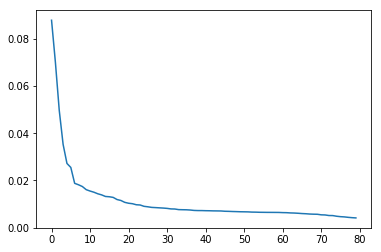

In [55]:
plt.plot(pca.explained_variance_ratio_)

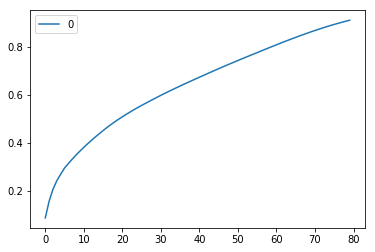

In [58]:
pd.DataFrame(pca.explained_variance_ratio_).cumsum().plot()

In [59]:
# Investigate the variance accounted for by each principal component.

pd.DataFrame(pca.explained_variance_ratio_).cumsum()

,0
0,0.087819
1,0.157854
2,0.207522
3,0.242819
4,0.270024
5,0.295538
6,0.314334
7,0.332514
8,0.349950
9,0.366063


In [61]:
# Re-apply PCA to the data while selecting for number of components to retain.

# at around 60 components, we see about 80% of the variance explained

pca = PCA(n_components=60) 
pca.fit(cleandata)

pcadata = pca.fit_transform(cleandata)

pca.explained_variance_ratio_.sum()

0.79909101047368991

### Discussion 2.2: Perform Dimensionality Reduction

We can see that at around 60 components, we've captured about 80% of the variance of the dataset. This is a significant improve from our original 154 features in terms of dimensionality and therefore in terms of improvements in clustering training. 

### Step 2.3: Interpret Principal Components

Now that we have our transformed principal components, it's a nice idea to check out the weight of each variable on the first few components to see if they can be interpreted in some fashion.

As a reminder, each principal component is a unit vector that points in the direction of highest variance (after accounting for the variance captured by earlier principal components). The further a weight is from zero, the more the principal component is in the direction of the corresponding feature. If two features have large weights of the same sign (both positive or both negative), then increases in one tend expect to be associated with increases in the other. To contrast, features with different signs can be expected to show a negative correlation: increases in one variable should result in a decrease in the other.

- To investigate the features, you should map each weight to their corresponding feature name, then sort the features according to weight. The most interesting features for each principal component, then, will be those at the beginning and end of the sorted list. Use the data dictionary document to help you understand these most prominent features, their relationships, and what a positive or negative value on the principal component might indicate.
- You should investigate and interpret feature associations from the first three principal components in this substep. To help facilitate this, you should write a function that you can call at any time to print the sorted list of feature weights, for the *i*-th principal component. This might come in handy in the next step of the project, when you interpret the tendencies of the discovered clusters.

In [64]:
pca.components_.shape

(60, 154)

In [66]:
pd.DataFrame(pca.components_[0])

,0
0,-0.007382
1,-0.062005
2,0.112213
3,-0.056907
4,-0.091853
5,-0.001609
6,-0.071124
7,0.020936
8,-0.093744
9,0.116916


In [81]:
# Map weights for the first principal component to corresponding feature names
# and then print the linked values, sorted by weight.
# HINT: Try defining a function here or in a new cell that you can reuse in the
# other cells.

def map_pca_weights(pca, n_comp):
    comps = list(pca.components_[n_comp])
    outdf = pd.DataFrame({"Weights": comps, "Feature": list(test_df.columns)})
    outdf = outdf.set_index("Feature")
    outdf = outdf.sort_values("Weights", ascending=False)
    return outdf

In [85]:
map_pca_weights(pca, 0)

,Weights
Feature,
LP_STATUS_GROB_1.0,0.200861
HH_EINKOMMEN_SCORE,0.186865
PLZ8_BAUMAX,0.166449
PLZ8_ANTG3,0.165702
FINANZ_SPARER,0.152625
PLZ8_ANTG4,0.149466
ORTSGR_KLS9,0.146004
CAMEO_INTL_2015_TEN,0.145824
EWDICHTE,0.144311


In [86]:
# Map weights for the second principal component to corresponding feature names
# and then print the linked values, sorted by weight.

map_pca_weights(pca, 1)

,Weights
Feature,
PRAEGENDE_JUGENDJAHRE_GEN,0.221747
SEMIO_REL,0.211855
FINANZ_SPARER,0.204900
FINANZ_UNAUFFAELLIGER,0.203128
SEMIO_TRADV,0.195334
SEMIO_PFLICHT,0.190980
FINANZ_ANLEGER,0.186395
SEMIO_KULT,0.177309
ONLINE_AFFINITAET,0.173014


In [87]:
# Map weights for the third principal component to corresponding feature names
# and then print the linked values, sorted by weight.

map_pca_weights(pca, 2)

,Weights
Feature,
ANREDE_KZ_1,0.331297
SEMIO_VERT,0.303101
SEMIO_SOZ,0.238617
SEMIO_FAM,0.237954
SEMIO_KULT,0.225262
FINANZTYP_5,0.131104
FINANZ_MINIMALIST,0.121734
SHOPPER_TYP_0.0,0.111283
SEMIO_REL,0.094812


### Discussion 2.3: Interpret Principal Components

In the first component, we can see that there are positive values for categories that are related to income. This is important since it essentially identifies that a strong delineator of variability in the demographic dataset is that of income, which is naturally understandable as socio-economic status is often a strong explanatory factor in segregating people in society. The extreme lower values further demonstrate this fact that the variability is explained by financial topics such as interest in financial topology and financial mobility.  
  
In the second component, we see the upper and lower values being more about the personality and psychographics of the person. For example, the most explaining factors are about their generational experiences as well as their personality preferences with some being very dominant explaining factors such as having a religious orientation.   
  
In the third component, we mainly see differentiation of separation along gender. This is also understandable as gender is consistently a fault line in surveys and studies in the social sciences domain.  Overall, I think all three of these components are very logical, identifying key segmentation lines based around socio-economic status, psychology, and gender.  

## Step 3: Clustering

### Step 3.1: Apply Clustering to General Population

You've assessed and cleaned the demographics data, then scaled and transformed them. Now, it's time to see how the data clusters in the principal components space. In this substep, you will apply k-means clustering to the dataset and use the average within-cluster distances from each point to their assigned cluster's centroid to decide on a number of clusters to keep.

- Use sklearn's [KMeans](http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans) class to perform k-means clustering on the PCA-transformed data.
- Then, compute the average difference from each point to its assigned cluster's center. **Hint**: The KMeans object's `.score()` method might be useful here, but note that in sklearn, scores tend to be defined so that larger is better. Try applying it to a small, toy dataset, or use an internet search to help your understanding.
- Perform the above two steps for a number of different cluster counts. You can then see how the average distance decreases with an increasing number of clusters. However, each additional cluster provides a smaller net benefit. Use this fact to select a final number of clusters in which to group the data. **Warning**: because of the large size of the dataset, it can take a long time for the algorithm to resolve. The more clusters to fit, the longer the algorithm will take. You should test for cluster counts through at least 10 clusters to get the full picture, but you shouldn't need to test for a number of clusters above about 30.
- Once you've selected a final number of clusters to use, re-fit a KMeans instance to perform the clustering operation. Make sure that you also obtain the cluster assignments for the general demographics data, since you'll be using them in the final Step 3.3.

In [89]:
# Over a number of different cluster counts...


    # run k-means clustering on the data and...
    
    
    # compute the average within-cluster distances.
    
    
from sklearn.cluster import KMeans

score = []

for i in range(3, 13):
    
    print(f"Currently training on {i}")
    
    kmeans = KMeans(n_clusters=i, random_state=42).fit(pcadata)
    
    # compute the average within-cluster distances.
    distance = abs(kmeans.score(pcadata))
    score.append(distance)
    

print(score)

Currently training on 3
Currently training on 4
Currently training on 5
Currently training on 6
Currently training on 7
Currently training on 8
Currently training on 9
Currently training on 10
Currently training on 11
Currently training on 12
[77116323.000619948, 74576256.575517446, 72530717.257770687, 69767483.974526942, 68172544.330439895, 66836797.266123913, 65813006.670081466, 64667688.963611625, 63807009.009176739, 63113291.039097004]


In [92]:
pcadata.shape

(720600, 60)

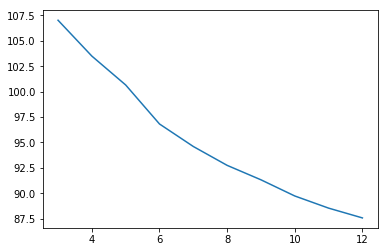

In [102]:
# Investigate the change in within-cluster distance across number of clusters.
# HINT: Use matplotlib's plot function to visualize this relationship.

plt.plot([3,4,5,6,7,8,9,10,11,12], [x / pcadata.shape[0] for x in score])

In [103]:
# Re-fit the k-means model with the selected number of clusters and obtain
# cluster predictions for the general population demographics data.

kmeans = KMeans(n_clusters=9, random_state=42).fit(pcadata)

In [104]:
cluster_labels = kmeans.predict(pcadata)

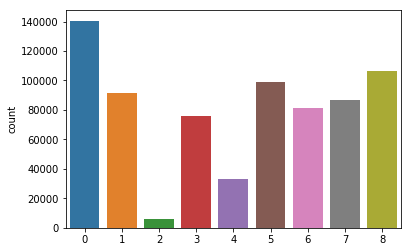

In [106]:
sns.countplot(cluster_labels)

In [109]:
pca.inverse_transform(kmeans.cluster_centers_).shape

(9, 154)

In [113]:
pd.DataFrame(pca.inverse_transform(kmeans.cluster_centers_), columns=test_df.columns).transpose()

,0,1,2,3,4,5,6,7,8
ANZ_TITEL,-0.073739,-0.069307,0.034971,-0.070123,1.481292,-0.105631,-0.050819,-0.049170,-0.082947
KBA13_ANZAHL_PKW,-0.212497,-0.154935,0.180719,0.190391,0.016852,0.234123,-0.166395,0.123976,0.071507
ANZ_HAUSHALTE_AKTIV,0.584070,0.293334,-0.665891,-0.363919,-0.470934,-0.436263,0.400585,-0.032033,-0.455511
MIN_GEBAEUDEJAHR,-0.202805,-0.199561,4.744316,0.221159,0.066366,0.029690,-0.183928,-0.126648,0.223492
ANZ_PERSONEN,-0.323661,-0.264779,0.279129,0.376090,0.576957,0.452857,-0.265934,-0.262394,0.188173
ANZ_HH_TITEL,0.006845,-0.034841,0.001710,-0.027831,0.097845,0.030884,-0.041354,-0.048142,0.052192
WOHNDAUER_2008,0.071819,-0.444741,-0.242773,-0.166482,0.320865,0.317802,-0.427453,0.148608,0.227989
W_KEIT_KIND_HH,0.161013,-0.002233,-0.441345,-0.302865,-0.236609,-0.150634,0.104096,0.174722,0.020467
BALLRAUM,-0.384246,-0.310745,0.087497,0.484629,0.177283,0.040130,-0.317933,0.045351,0.537796
SEMIO_PFLICHT,-0.525165,0.983063,-0.265465,0.811764,-0.190441,-0.352924,0.722185,-0.596606,-0.391378


### Discussion 3.1: Apply Clustering to General Population

I have decided to cluster in to 9 groups. I think this is a good amount of delineation without overwhelming the human domain interpretability of the domains so that it can actually be used in the business domain. Again, I think the separations are quiet understandable for a marketing department or a sales department, as the clusters have strong centroid separations in terms of socio-economic status, lifestyles, and I think 9 clusters is very manageable for example for the communications or design teams.  

### Step 3.2: Apply All Steps to the Customer Data

Now that you have clusters and cluster centers for the general population, it's time to see how the customer data maps on to those clusters. Take care to not confuse this for re-fitting all of the models to the customer data. Instead, you're going to use the fits from the general population to clean, transform, and cluster the customer data. In the last step of the project, you will interpret how the general population fits apply to the customer data.

- Don't forget when loading in the customers data, that it is semicolon (`;`) delimited.
- Apply the same feature wrangling, selection, and engineering steps to the customer demographics using the `clean_data()` function you created earlier. (You can assume that the customer demographics data has similar meaning behind missing data patterns as the general demographics data.)
- Use the sklearn objects from the general demographics data, and apply their transformations to the customers data. That is, you should not be using a `.fit()` or `.fit_transform()` method to re-fit the old objects, nor should you be creating new sklearn objects! Carry the data through the feature scaling, PCA, and clustering steps, obtaining cluster assignments for all of the data in the customer demographics data.

In [119]:
# Load in the customer demographics data.
customers = pd.read_csv("Udacity_CUSTOMERS_Subset.csv", delimiter=";")

In [120]:
customers.head()

,AGER_TYP,ALTERSKATEGORIE_GROB,ANREDE_KZ,CJT_GESAMTTYP,FINANZ_MINIMALIST,FINANZ_SPARER,FINANZ_VORSORGER,FINANZ_ANLEGER,FINANZ_UNAUFFAELLIGER,FINANZ_HAUSBAUER,...,PLZ8_ANTG1,PLZ8_ANTG2,PLZ8_ANTG3,PLZ8_ANTG4,PLZ8_BAUMAX,PLZ8_HHZ,PLZ8_GBZ,ARBEIT,ORTSGR_KLS9,RELAT_AB
0,2,4,1,5.0,5,1,5,1,2,2,...,3.0,3.0,1.0,0.0,1.0,5.0,5.0,1.0,2.0,1.0
1,-1,4,1,NaN,5,1,5,1,3,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,-1,4,2,2.0,5,1,5,1,4,4,...,2.0,3.0,3.0,1.0,3.0,3.0,2.0,3.0,5.0,3.0
3,1,4,1,2.0,5,1,5,2,1,2,...,3.0,2.0,1.0,0.0,1.0,3.0,4.0,1.0,3.0,1.0
4,-1,3,1,6.0,3,1,4,4,5,2,...,2.0,4.0,2.0,1.0,2.0,3.0,3.0,3.0,5.0,1.0


In [121]:
# Apply preprocessing, feature transformation, and clustering from the general
# demographics onto the customer data, obtaining cluster predictions for the
# customer demographics data.

customers_parsed = clean_data(customers)


In [122]:
customers_parsed.shape

(130473, 153)

In [126]:
for c in list(test_df.columns):
    if c not in customers_parsed.columns:
        print(c)

GEBAEUDETYP_5.0


In [127]:
customers_parsed["GEBAEUDETYP_5.0"] = 0

In [128]:
customers_parsed = impute.transform(customers_parsed)
customers_parsed = scaler.transform(customers_parsed)

In [130]:
customer_pca = pca.transform(customers_parsed)

In [131]:
customer_labels = kmeans.predict(customer_pca)

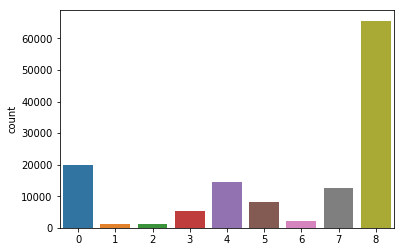

In [133]:
sns.countplot(customer_labels)

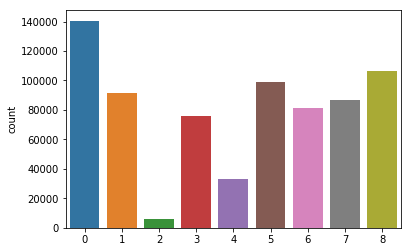

In [134]:
sns.countplot(cluster_labels)

### Step 3.3: Compare Customer Data to Demographics Data

At this point, you have clustered data based on demographics of the general population of Germany, and seen how the customer data for a mail-order sales company maps onto those demographic clusters. In this final substep, you will compare the two cluster distributions to see where the strongest customer base for the company is.

Consider the proportion of persons in each cluster for the general population, and the proportions for the customers. If we think the company's customer base to be universal, then the cluster assignment proportions should be fairly similar between the two. If there are only particular segments of the population that are interested in the company's products, then we should see a mismatch from one to the other. If there is a higher proportion of persons in a cluster for the customer data compared to the general population (e.g. 5% of persons are assigned to a cluster for the general population, but 15% of the customer data is closest to that cluster's centroid) then that suggests the people in that cluster to be a target audience for the company. On the other hand, the proportion of the data in a cluster being larger in the general population than the customer data (e.g. only 2% of customers closest to a population centroid that captures 6% of the data) suggests that group of persons to be outside of the target demographics.

Take a look at the following points in this step:

- Compute the proportion of data points in each cluster for the general population and the customer data. Visualizations will be useful here: both for the individual dataset proportions, but also to visualize the ratios in cluster representation between groups. Seaborn's [`countplot()`](https://seaborn.pydata.org/generated/seaborn.countplot.html) or [`barplot()`](https://seaborn.pydata.org/generated/seaborn.barplot.html) function could be handy.
  - Recall the analysis you performed in step 1.1.3 of the project, where you separated out certain data points from the dataset if they had more than a specified threshold of missing values. If you found that this group was qualitatively different from the main bulk of the data, you should treat this as an additional data cluster in this analysis. Make sure that you account for the number of data points in this subset, for both the general population and customer datasets, when making your computations!
- Which cluster or clusters are overrepresented in the customer dataset compared to the general population? Select at least one such cluster and infer what kind of people might be represented by that cluster. Use the principal component interpretations from step 2.3 or look at additional components to help you make this inference. Alternatively, you can use the `.inverse_transform()` method of the PCA and StandardScaler objects to transform centroids back to the original data space and interpret the retrieved values directly.
- Perform a similar investigation for the underrepresented clusters. Which cluster or clusters are underrepresented in the customer dataset compared to the general population, and what kinds of people are typified by these clusters?

In [190]:
# Compare the proportion of data in each cluster for the customer data to the
# proportion of data in each cluster for the general population.

demo_labels = pd.DataFrame({"DemographicsLabels": cluster_labels})
cust_labels = pd.DataFrame({"CustomerLabels": customer_labels})

In [191]:
demo_labels.DemographicsLabels.value_counts() / demo_labels.shape[0]

0    0.195092
8    0.147655
5    0.137227
1    0.126980
7    0.120779
6    0.112770
3    0.105208
4    0.046378
2    0.007911
Name: DemographicsLabels, dtype: float64

In [192]:
cust_labels.CustomerLabels.value_counts() / cust_labels.shape[0]

8    0.502786
0    0.153327
4    0.110069
7    0.096204
5    0.062358
3    0.039679
6    0.016524
1    0.009780
2    0.009274
Name: CustomerLabels, dtype: float64

In [193]:
compare_cust_demo_df = pd.concat([cust_labels.CustomerLabels.value_counts() / cust_labels.shape[0], demo_labels.DemographicsLabels.value_counts() / demo_labels.shape[0]], axis=1)

In [194]:
compare_cust_demo_df

,CustomerLabels,DemographicsLabels
0,0.153327,0.195092
1,0.009780,0.126980
2,0.009274,0.007911
3,0.039679,0.105208
4,0.110069,0.046378
5,0.062358,0.137227
6,0.016524,0.112770
7,0.096204,0.120779
8,0.502786,0.147655


In [195]:
compare_cust_demo_df["diff"] = compare_cust_demo_df.CustomerLabels - compare_cust_demo_df.DemographicsLabels

In [196]:
compare_cust_demo_df.sort_values("diff")

,CustomerLabels,DemographicsLabels,diff
1,0.009780,0.126980,-0.117200
6,0.016524,0.112770,-0.096245
5,0.062358,0.137227,-0.074870
3,0.039679,0.105208,-0.065529
0,0.153327,0.195092,-0.041765
7,0.096204,0.120779,-0.024575
2,0.009274,0.007911,0.001362
4,0.110069,0.046378,0.063691
8,0.502786,0.147655,0.355131


In [197]:
# What kinds of people are part of a cluster that is overrepresented in the
# customer data compared to the general population?

# custommer data set is significantly over represented in cluster 8
kmeans.cluster_centers_[8]

array([-3.74001178,  0.02942226, -0.02960516, -2.23251217, -0.93066548,
        0.63175147, -0.54978153,  1.13508914,  0.90259887, -0.02775913,
       -0.23205994, -0.5041771 ,  0.28124444, -0.05031373,  0.32473436,
       -0.05310596,  0.98929001, -0.48062472,  0.35532127,  0.15344462,
       -0.40792931,  0.05370849,  0.06026364,  0.14035333, -0.12265532,
        0.10660804,  0.03919937, -0.19586962, -0.07937187, -0.1476653 ,
       -0.17874504,  0.12188969, -0.02278219, -0.0553551 ,  0.01946276,
        0.07616303,  0.08261134, -0.03984206, -0.08730131, -0.00883776,
       -0.01419497,  0.04682118,  0.00929987, -0.03196034, -0.01961898,
        0.01197251, -0.03778724, -0.0956547 , -0.09514234, -0.00960407,
        0.06690887,  0.01464421, -0.08441773, -0.00922788,  0.04021065,
        0.00658129, -0.03675602, -0.06222999,  0.02678774,  0.05615931])

In [198]:
customer_over = pd.DataFrame({"colname": test_df.columns,  "feature": (pca.inverse_transform(kmeans.cluster_centers_[8]))})

In [199]:
customer_over.sort_values("feature", ascending=False)

,colname,feature
152,LP_STATUS_GROB_4.0,1.958740
121,LP_STATUS_FEIN_9.0,1.921226
32,FINANZ_MINIMALIST,1.093382
51,PLZ8_ANTG1,0.651375
36,KONSUMNAEHE,0.641456
61,WOHNLAGE,0.633284
39,INNENSTADT,0.627477
134,GREEN_AVANTGARDE_0,0.555380
8,BALLRAUM,0.537796
46,MOBI_REGIO,0.527173


In [200]:
# What kinds of people are part of a cluster that is underrepresented in the
# customer data compared to the general population?

# custommer data set is under represented in cluster 1

customer_under = pd.DataFrame({"colname": test_df.columns,  "feature": (pca.inverse_transform(kmeans.cluster_centers_[1]))})

In [201]:
customer_under.sort_values("feature", ascending=False)

,colname,feature
114,LP_STATUS_FEIN_2.0,1.438983
27,SEMIO_RAT,1.310249
65,FINANZTYP_1,1.295326
42,FINANZ_SPARER,1.146578
12,FINANZ_ANLEGER,1.033926
20,SEMIO_TRADV,1.032684
149,LP_STATUS_GROB_1.0,1.018173
112,ANREDE_KZ_2,1.008136
34,SEMIO_KAEM,0.984516
9,SEMIO_PFLICHT,0.983063


### Discussion 3.3: Compare Customer Data to Demographics Data

(Double-click this cell and replace this text with your own text, reporting findings and conclusions from the clustering analysis. Can we describe segments of the population that are relatively popular with the mail-order company, or relatively unpopular with the company?)

Definitely, I believe that the customers have found a large affinity to come from lower income, lower financial interest topology backgrounds, and below average wealth in neighborhoods. They tend to live in microcells that contain higher number of buildings than the general demographic as well and also has lower mobility. 

In the customer group that is under-represented vis-a-vis the general population, this group tends to be more traditional minded, older, and rational. They are far less likely to be financial minimalists, dreamy, sensual, and less likely to be socially minded, but rather to be more likely to be dominant-minded. 

> Congratulations on making it this far in the project! Before you finish, make sure to check through the entire notebook from top to bottom to make sure that your analysis follows a logical flow and all of your findings are documented in **Discussion** cells. Once you've checked over all of your work, you should export the notebook as an HTML document to submit for evaluation. You can do this from the menu, navigating to **File -> Download as -> HTML (.html)**. You will submit both that document and this notebook for your project submission.